<a href="https://colab.research.google.com/github/subandwho/tensorflow/blob/main/MulticlassFood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip')
zip_ref.extractall()
zip_ref.close()


--2021-07-13 09:05:02--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.31.128, 172.217.164.144, 142.250.73.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   253MB/s    in 2.0s    

2021-07-13 09:05:04 (253 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [4]:
import os
for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
  print(f"There are {len(dirnames)} and {len(filenames)} images in '{dirpath}'. '")


There are 2 and 0 images in '10_food_classes_all_data'. '
There are 10 and 0 images in '10_food_classes_all_data/train'. '
There are 0 and 750 images in '10_food_classes_all_data/train/steak'. '
There are 0 and 750 images in '10_food_classes_all_data/train/chicken_curry'. '
There are 0 and 750 images in '10_food_classes_all_data/train/hamburger'. '
There are 0 and 750 images in '10_food_classes_all_data/train/ice_cream'. '
There are 0 and 750 images in '10_food_classes_all_data/train/chicken_wings'. '
There are 0 and 750 images in '10_food_classes_all_data/train/grilled_salmon'. '
There are 0 and 750 images in '10_food_classes_all_data/train/sushi'. '
There are 0 and 750 images in '10_food_classes_all_data/train/fried_rice'. '
There are 0 and 750 images in '10_food_classes_all_data/train/pizza'. '
There are 0 and 750 images in '10_food_classes_all_data/train/ramen'. '
There are 10 and 0 images in '10_food_classes_all_data/test'. '
There are 0 and 250 images in '10_food_classes_all_data

In [5]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [6]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [7]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)
  img = mpimg.imread(target_folder +"/"+ random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('Off')
  print(f"Image shape : {img.shape}")
  return img

['443210.jpg']
Image shape : (512, 512, 3)


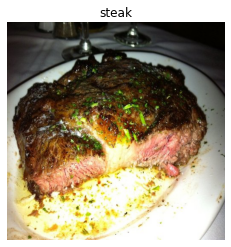

In [8]:
img = view_random_image(target_dir = train_dir, target_class = random.choice(class_names))

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)
train_data = train_datagen.flow_from_directory(train_dir, target_size = (224, 224), batch_size = 32, class_mode = 'categorical')
test_data = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size = 32, class_mode = 'categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [10]:
from tensorflow.python.keras.layers.pooling import MaxPool2D
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
model_new = Sequential([
                        Conv2D(10, 3, input_shape=(224,224,3), activation='relu'),
                        Conv2D(10, 3, activation='relu'),
                        MaxPool2D(pool_size=(3,3)),
                        Conv2D(10, 3, activation='relu'),
                        Conv2D(10, 3, activation='relu'),
                        MaxPool2D(pool_size=(3,3)),
                        Flatten(),
                        Dense(10, activation = 'softmax')
])
model_new.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
history = model_new.fit(train_data, epochs = 5, steps_per_epoch = len(train_data), validation_data = test_data, validation_steps = len(test_data) )

Epoch 1/5
235/235 [==============================] - 75s 184ms/step - loss: 2.2022 - accuracy: 0.1844 - val_loss: 2.1007 - val_accuracy: 0.2516
Epoch 2/5
235/235 [==============================] - 44s 187ms/step - loss: 1.9722 - accuracy: 0.3109 - val_loss: 1.9529 - val_accuracy: 0.3016
Epoch 3/5
235/235 [==============================] - 43s 182ms/step - loss: 1.7757 - accuracy: 0.3961 - val_loss: 1.9072 - val_accuracy: 0.3324
Epoch 4/5
235/235 [==============================] - 43s 183ms/step - loss: 1.5869 - accuracy: 0.4679 - val_loss: 1.8227 - val_accuracy: 0.3812
Epoch 5/5
235/235 [==============================] - 43s 181ms/step - loss: 1.4359 - accuracy: 0.5173 - val_loss: 1.9342 - val_accuracy: 0.3600


In [11]:
model_new.evaluate(test_data)

79/79 [==============================] - 20s 248ms/step - loss: 1.9342 - accuracy: 0.3600


[1.9341665506362915, 0.36000001430511475]

In [12]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs = range(len(history.history['loss']))
  plt.plot(epochs, loss, label='Training loss')
  plt.plot(epochs, val_loss, label = 'Val Loss')
  plt.title('Loss')
  plt.figure()
  plt.plot(epochs, accuracy, label='Training Accuracy')
  plt.plot(epochs, val_accuracy, label = 'Val Accuracy')
  plt.title('Accuracy')
  plt.legend()

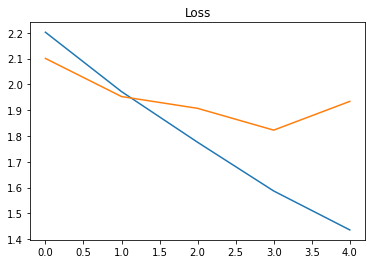

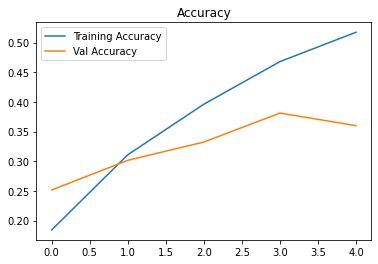

In [13]:
plot_loss_curves(history)

In [14]:
model_new1 = Sequential([
                        Conv2D(10, 3, input_shape=(224,224,3), activation='relu'),
                       
                        MaxPool2D(pool_size=(3,3)),
                        Conv2D(10, 3, activation='relu'),
                       
                        MaxPool2D(pool_size=(3,3)),
                        Flatten(),
                        Dense(10, activation = 'softmax')
])
model_new1.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
history2= model_new1.fit(train_data, epochs = 5, steps_per_epoch = len(train_data), validation_data = test_data, validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 41s 174ms/step - loss: 2.1292 - accuracy: 0.2365 - val_loss: 1.9504 - val_accuracy: 0.3072
Epoch 2/5
235/235 [==============================] - 47s 201ms/step - loss: 1.8774 - accuracy: 0.3457 - val_loss: 1.8598 - val_accuracy: 0.3412
Epoch 3/5
235/235 [==============================] - 46s 198ms/step - loss: 1.7010 - accuracy: 0.4235 - val_loss: 1.9578 - val_accuracy: 0.3240
Epoch 4/5
235/235 [==============================] - 52s 223ms/step - loss: 1.5364 - accuracy: 0.4864 - val_loss: 1.8360 - val_accuracy: 0.3668
Epoch 5/5
235/235 [==============================] - 56s 239ms/step - loss: 1.3462 - accuracy: 0.5539 - val_loss: 1.8756 - val_accuracy: 0.3660


In [ ]:
plot_loss_curves(model_new1)

In [16]:
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,  featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir, target_size = (224, 224), batch_size = 32, class_mode='categorical', shuffle = True)
model_new2 = Sequential([
                        Conv2D(10, 3, input_shape=(224,224,3), activation='relu'),
                        Conv2D(10, 3, activation='relu'),
                        MaxPool2D(pool_size=(3,3)),
                        Conv2D(10, 3, activation='relu'),
                        Conv2D(10, 3, activation='relu'),
                        MaxPool2D(pool_size=(3,3)),
                        Flatten(),
                        Dense(10, activation = 'softmax')])
model_new2.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
history2 = model_new2.fit(train_data_augmented, epochs = 5, steps_per_epoch = len(train_data), validation_data = test_data, validation_steps = len(test_data))
                        

Found 7500 images belonging to 10 classes.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/5
235/235 [==============================] - 115s 490ms/step - loss: 2.2025 - accuracy: 0.1796 - val_loss: 2.0466 - val_accuracy: 0.2620
Epoch 2/5
235/235 [==============================] - 116s 493ms/step - loss: 2.1066 - accuracy: 0.2415 - val_loss: 1.9849 - val_accuracy: 0.3064
Epoch 3/5
235/235 [==============================] - 131s 558ms/step - loss: 2.0556 - accuracy: 0.2699 - val_loss: 1.9673 - val_accuracy: 0.3284
Epoch 4/5
235/235 [==============================] - 124s 527ms/step - loss: 2.0045 - accuracy: 0.2957 - val_loss: 1.8274 - val_accuracy: 0.3672
Epoch 5/5
235/235 [==============================] - 147s 624ms/step - loss: 1.9803 - accuracy: 0.3077 - val_loss: 1.8747 - val_accuracy: 0.3468


In [17]:
model_new2.evaluate(test_data)

79/79 [==============================] - 17s 215ms/step - loss: 1.8747 - accuracy: 0.3468


[1.8747408390045166, 0.3467999994754791]

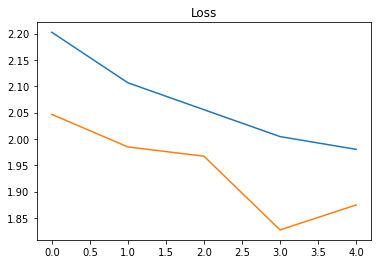

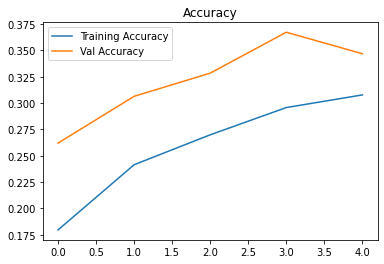

In [18]:
plot_loss_curves(history2)

In [19]:
!wget /content/icecreamtraining.jpg
!wget /content/pizza.jpg

/content/icecreamtraining.jpg: Scheme missing.
/content/pizza.jpg: Scheme missing.


In [20]:
def load_preprocess(filename, imshape = 224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size=[imshape, imshape])
  img = img/255.
  return img

In [22]:
def pred_and_plot(model, filename, class_names=class_names):
  img = load_preprocess(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
      pred_class = class_names[int(tf.round(pred[0]))]

   
  plt.imshow(img)
  plt.title(f"Predicted class: {pred_class}")
  plt.axis(False)

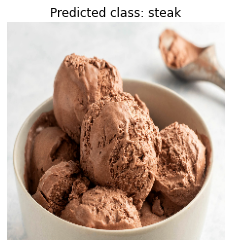

In [23]:
pred_and_plot(model_new2, 'icecreamtraining.jpg')

In [24]:
model_new2.save('Saved MultiClass Food')

INFO:tensorflow:Assets written to: Saved MultiClass Food/assets
